In [1]:
import torch
import bvp as bvp
from matplotlib import pyplot as plt
import bvp_pde as bvp_pde

epoch:999, loss:0.00023, (0.00000,0.00023): 100%|██████████| 1000/1000 [00:15<00:00, 62.54it/s]


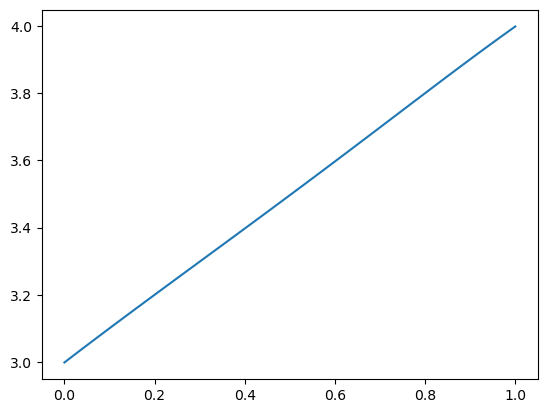

In [2]:
# Linear 1D differential equation:
model = bvp.MLP(1, 1, 10)
solver = bvp_pde.LinearSolver(model)
solver.solve(model, epochs=1000, lr=3e-3, bs=1000)
test_x = torch.linspace(0., 1., 100).view(-1,1)
with torch.no_grad():
    output = model(test_x)
    y = output.detach().cpu().numpy()
    plt.plot(test_x.detach().cpu().numpy(), y)
    plt.show()


epoch:999, loss:0.00258, (0.00257,0.00007): 100%|██████████| 1000/1000 [00:35<00:00, 28.56it/s]


torch.Size([10000, 2])
(100, 100)


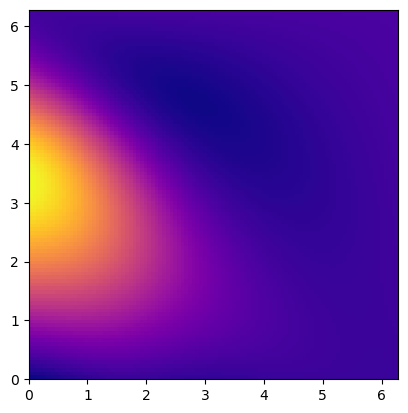

In [ ]:
# Solve Laplace equation
model = bvp.MLP(2, 1, 1024)
model = model.cuda()
solver = bvp_pde.LaplaceSolver(model, alpha=0.1)
solver.solve(model, epochs=1000, lr=1e-4, bs=512)
test_x1 = torch.linspace(0., 2*torch.pi, 100)
test_x2 = torch.linspace(0., 2*torch.pi, 100)
X1, X2 = torch.meshgrid(test_x1, test_x2, indexing="ij")
X = torch.cat((X1.reshape(-1,1), X2.reshape(-1,1)), dim=-1)
print(X.shape)
with torch.no_grad():
    output = model(X)
    y = output.reshape(X1.shape).detach().cpu().numpy()
    print(y.shape)
    plt.imshow(y, cmap='plasma', extent=[torch.min(X1).item(),torch.max(X1).item(),torch.min(X2).item(),torch.max(X2).item()])
    plt.show()